In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
class Perceptron():
    def __init__(self, lr=0.01, n_iter=50, random_state=1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors = []

        iterations = 1
        while iterations <= self.n_iter:
            errors = 0
            for xi, yi in zip(X, y):
                delta_wi = self.lr * (yi - self.predict(xi))
                self.w[1:] += delta_wi * xi
                self.w[0] += delta_wi
                errors += int(delta_wi != 0.0)
            self.errors.append(errors)
            iterations += 1
            
        return self

        
    def compute_z(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return np.where(self.compute_z(X) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('datasets/iris.csv', header=None, encoding='utf-8')
df.head(5)

,0,1,2,3,4
0,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:
X = df.iloc[1:100, :-1].values
y = df.iloc[1:100, -1].values

In [ ]:
y = np.where(y == 'Iris-setosa', 1, 0)
X = X.astype(float)

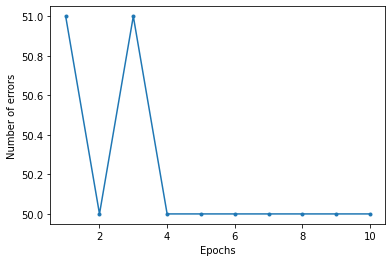

In [22]:
perceptron = Perceptron(lr=0.1, n_iter=10)
perceptron.fit(X, y)
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()